In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
import scipy.stats as stats
import seaborn as sns; sns.set_context('notebook')
figsize=(45,10)
from IPython.core.pylabtools import figsize
figsize(14.5,6.5)
from sklearn import linear_model



# Linear Bandit Solver

### Bayesian Linear Regression


False

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


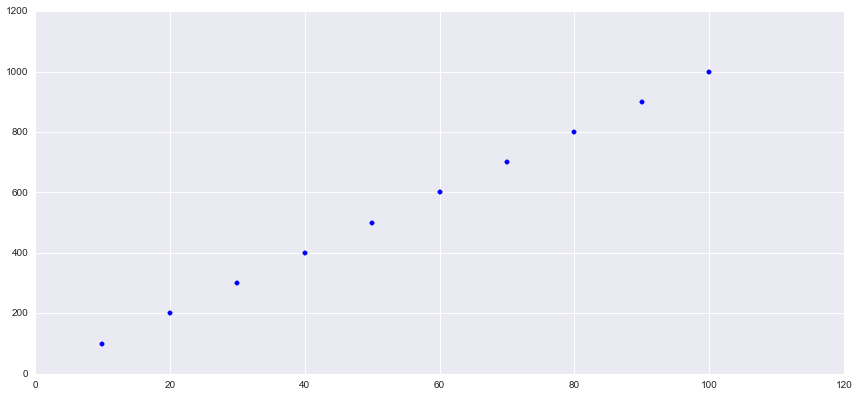

In [170]:
num_features = 1
num_data = 10

from sklearn.datasets import make_regression 

X1 = np.atleast_2d(np.linspace(10,100,num_data)).T

np.random.shuffle(X1)
def evaluate(X):
    return  X*10  #+ np.random.normal(0,1)
y1 = []
for i in range(num_data):
    y1 += [evaluate(X1[i,:])]
y1 = np.array(y1).flatten()

X,y,coef = make_regression(num_data,num_features,noise   = 20,shuffle=True, coef = True)
y = -y
#X1,y1,coef = make_regression(num_data,num_features,noise   = 20,shuffle=True, coef = True)
X = X1
y = y1
#y += 100
#X = np.array([0.4,.6,.3,.1])#,.11,.2,0.,.9,0.25,.35])#addeed some fake near-linear observations
#y = np.array([.05,-.35,0,-.055])#,0.,.2,0.1,.5,-.9,.8])

#X = np.atleast_2d(X)
#y = X.copy()
#plt.scatter(X1,y1,color = 'red')
plt.scatter(X,y,color = 'blue')

#X.shape,X1.shape,y.shape,y1.shape,type(X),type(X1),(X+X1).shape,type(y),type(y1),(y+y1).shape
#X[:10],X1[:10]
#y[:10],y1[:10]
(X == y).all()

#X[:10],X1[:10]

In [185]:
class BayesReg(object):
    def __init__(self,num_features,alpha = 1,beta = 1):
        self.num_features = num_features
        self.B = np.eye(self.num_features+1)*alpha
        self.Binv = np.linalg.inv(self.B)
        self.f = np.atleast_2d(np.zeros(num_features+1)).T
        #self.f = self.f.T
        self.mu = 1
        self.beta = beta
        
    def add_intercept(self,X):
        try:
            X.shape[1]
        except:
            X = np.atleast_2d(X)
        X_new = np.ones((X.shape[0],X.shape[1]+1),dtype=X.dtype)
        X_new[:,1:] = X[:,:]
        return np.atleast_2d(np.append(X[::-1],1)[::-1])

        return X_new[0]
    
    def add_intercept2(self,X):
        return np.atleast_2d(X).T
        #X = np.atleast_2d(X)
        #X = np.append(np.atleast_2d(np.ones(shape=X.shape[1])).T,X,axis=1)
        #return X
    
    def observe_x(self,x,y):
        x = self.add_intercept(x)
        #print(np.outer(x,x))
        self.B = self.B + np.outer(x,x)
        #print(self.B)
        self.Binv = np.linalg.inv(self.B)
        #self.Binv = 1/self.B 
        #self.f = self.f + np.dot(x,y)
        #print(x*y)
        #print(np.dot(x,y))
        self.f = self.f + (x*y).T
        #self.f = self.f.
        #print('f')
        print(self.f)
        #print('nof')
        self.mu += np.dot(self.Binv,self.f)
        #self.mu = self.mu.T
        #print('mu')
        print(self.mu)
        #print('nomu')
        #self.mu += self.Binv * self.f
    
        
    def train(self,X,y,shuffle = True):
        index = list(range(X.shape[0]))
        if shuffle ==True:
            np.random.shuffle(index)
        for i in index:
            self.observe_x(X[i],y[i])

    def predict(self,X):
        """predicts ML estimate (non bayesian)"""
        pred_list = []
        self.muc = self.beta*self.Binv.dot(self.mu)
        for i in range(X.shape[0]):
            pred_list += [np.sum(self.muc.T.dot(self.add_intercept(X[i]).T),axis=1)]
            
        return np.array(pred_list)
    
    def sx(self,x):
        x = self.add_intercept(x)
        return np.sqrt(1/self.beta + x.dot(self.Binv).dot(x.T))
    
    def mx(self,x,N=1):
        x = self.add_intercept(x)
        x_Binv = self.Binv.dot(self.mu)
        return self.beta*N*x.dot(x_Binv)
    
    def predict_dist(self,X):
        sx = []
        mx = []
        for i in range(X.shape[0]):
            sx += [self.sx(X[i])]
            mx += [self.mx(X[i])]
        sx = np.asarray(sx)
        mx = np.asarray(mx)
        return mx,sx
    
    def draw(self,num=1):
        """ MUC instead of MU?!"""
        w = []
        self.muc = self.beta*self.Binv.dot(self.mu)
        print(self.muc)

        for i in range(num):
            w += [stats.multivariate_normal.rvs(self.muc.flatten(),self.Binv)]
        return w
        
        
        

In [186]:
test = BayesReg(num_features,alpha = 1,beta = 1)
A = test.add_intercept(X[0])
t = y[0]
B = np.atleast_2d(A)
np.outer(A,A)

array([[   1.,   20.],
       [  20.,  400.]])

In [187]:
A

array([[  1.,  20.]])

In [188]:
np.outer(B,B)

array([[   1.,   20.],
       [  20.,  400.]])

In [189]:
D = (A*t)
D.shape

(1, 2)

In [190]:
C = (B*t).T
C.shape

(2, 1)

In [191]:
np.dot(A,D).shape

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [192]:
np.dot(D,C).shape

(1, 1)

In [193]:
test.train(X,y)

[[  300.]
 [ 9000.]]
[[  1.33259424]
 [ 10.97782705]]
[[  1000.]
 [ 58000.]]
[[  1.46767461]
 [ 20.97377464]]
[[  1600.]
 [ 94000.]]
[[  1.60096351]
 [ 30.97044242]]
[[   2100.]
 [ 119000.]]
[[  1.73728289]
 [ 40.96719672]]
[[   2200.]
 [ 120000.]]
[[  1.83047953]
 [ 50.96465499]]
[[   3200.]
 [ 220000.]]
[[  1.89248663]
 [ 60.96329859]]
[[   4100.]
 [ 301000.]]
[[  1.94887657]
 [ 70.96219829]]
[[   4900.]
 [ 365000.]]
[[  2.00430079]
 [ 80.9611803 ]]
[[   5300.]
 [ 381000.]]
[[  2.05724255]
 [ 90.9601814 ]]
[[   5500.]
 [ 385000.]]
[[   2.10269297]
 [ 100.95927239]]


In [194]:
test.mu

array([[   2.10269297],
       [ 100.95927239]])

In [195]:
lin = np.linspace(min(X)*2,max(X)*2,100)#(-3,3,100)#
num_draws = 10

m,s = test.predict_dist(lin)
w = test.draw(num=num_draws)
w[0][0]

[[ 0.21013116]
 [-0.00037955]]


1.0183810830209872

ValueError: x and y can be no greater than 2-D

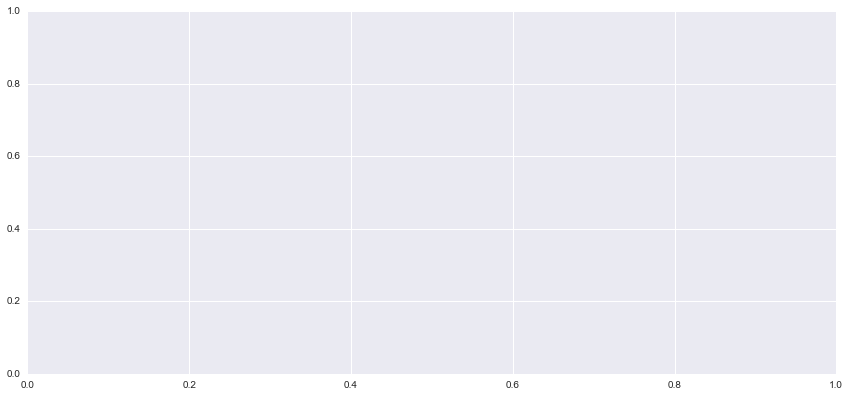

In [196]:
exponent = 10
plt.plot(lin,m,color='red',linewidth = 3,label='predictive Mean')
#plt.plot(X,y,'x')
plt.scatter(X,y,color='black',label='data')
for i in range(num_draws-1):
    plt.plot(lin,lin*w[i+1][1]+w[i+1][0],color='cyan',alpha = (np.log(num_draws)+1)/num_draws)
plt.plot(lin,lin*w[0][1]+w[0][0],color='cyan',alpha = (np.log(num_draws)+1)/num_draws,label = 'draws')

plt.plot(lin,m - s**exponent,'blue',linewidth = 3,label='uncertainty')
plt.plot(lin,m + s**exponent,'blue',linewidth = 3)

plt.legend()
plt.fill_between(lin,m,m- s**exponent,alpha = .3)
plt.fill_between(lin,m,m + s**exponent,alpha = .3)

lin.shape, m.shape, s.shape

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X,y)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


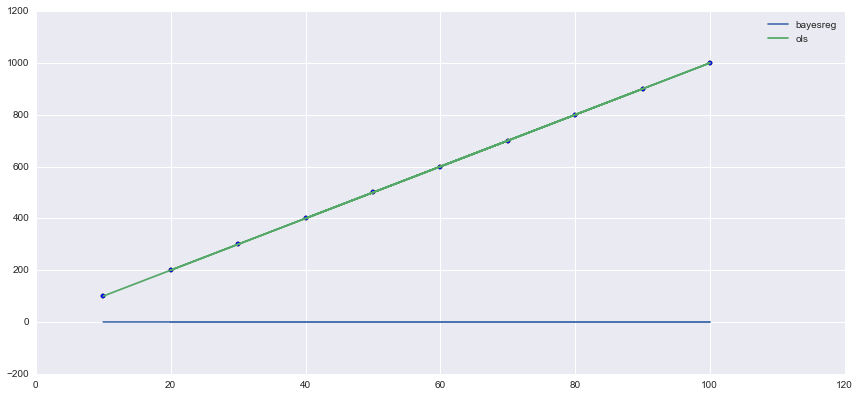

In [197]:
plt.plot(X,test.predict(X),label = 'bayesreg')
plt.scatter(X,y)

plt.plot(X,regr.predict(X),label = 'ols')
plt.legend()